In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from math import floor


import json
from pprint import pprint

In [2]:
json_path="./data/balancers.json"
with open(json_path) as f:
    data = json.load(f)

In [3]:
timings = []

for d in data["datapoints"]:
    comp_time = list(map(lambda x: x["computationTime"],
                   d["data"]["workers"]))
    if d["balancer"] == "naiveRecursive":
        timings += comp_time
     

# time in s
timings = np.asarray(timings) / 1e6
print(timings)

[1.6466600e-01 3.1990000e-02 8.4303000e-02 5.7014600e-01 1.4571200e-01
 1.0936570e+00 8.8668000e-02 3.3970000e-02 4.8963100e-01 9.5268000e-02
 8.2639000e-02 1.4635400e-01 1.0479320e+00 8.5120000e-02 6.0475000e-02
 8.0315000e-02 8.5403000e-02 1.0800100e-01 6.2351000e-02 1.1851200e-01
 6.4968000e-02 1.7652300e+00 8.8107000e-02 1.4547100e-01 8.2414000e-02
 1.1975400e-01 6.2897000e-02 1.0930200e-01 6.3592000e-02 6.2392000e-02
 1.0024268e+01 1.1789102e+01 1.1693753e+01 1.1845762e+01 1.8543522e+01
 1.8575630e+01 8.0130000e-02 2.4924000e-01 2.6395000e-01 2.8398400e-01
 2.6175500e-01 1.8151100e-01 2.9837200e-01 2.1005900e-01 4.4000600e-01
 1.0051200e-01 4.8016300e-01 2.4196700e-01 2.6332100e-01 4.9202700e-01
 3.5413000e-01 2.8072200e-01 1.9142300e-01 2.2867900e-01 1.1644900e-01
 2.3825100e-01 4.8860600e-01 4.3265930e+00 2.8283300e-01 1.8156700e-01
 6.2346200e-01 2.2025500e-01 6.4648180e+00 2.0981000e-01 3.8472500e-01
 3.8353900e-01 2.8079680e+00 3.6359200e-01 3.5827900e-01 2.0289100e-01
 1.602

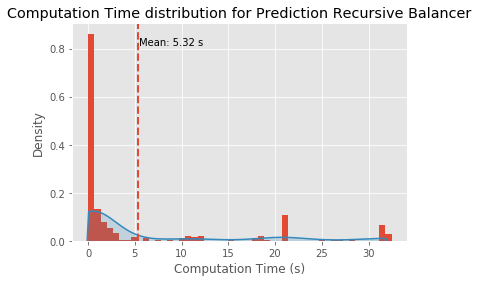

In [6]:
# Data for plotting

num_bins = 50
plt.style.use('ggplot')
fig, ax = plt.subplots()

# draw histogram
n, bins, patches = ax.hist(timings, num_bins, density= 1)
# ax.legend()
ax.set(xlabel='Computation Time (s)', ylabel='Density',
       title='Computation Time distribution for Prediction Recursive Balancer')
ax.grid(True)

# plot kernel density estimate
density = gaussian_kde(timings)
xs = np.linspace(-0.1, timings.max(), 200)
density.covariance_factor = lambda : .25
density._compute_covariance()
ys = density(xs)
# TODO: Find a better way to do this
ys[0] = 0
ys[-1] = 0

kde_line = ax.plot(xs, ys)
kde_fill = ax.fill(xs, ys, alpha=.2)
kde_fill[0].set_color(kde_line[0].get_color())

# plot median
ax.axvline(timings.mean(), linestyle='dashed', linewidth=2)
_, max_ = plt.ylim()
plt.text(timings.mean() + timings.mean() / num_bins, 
         max_ - max_ / 10, 
         'Mean: {:.2f} s'.format(timings.mean()))

# fig.savefig("impl_test.svg", format="svg")
plt.show()